In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from astropy.io import fits
import glob

In [3]:
fnames = glob.glob('/data2/GBT/3C295/OnOff/scan*/*.fits')
fnames.sort()

In [4]:
k = 4

In [5]:
print fnames[k]

/data2/GBT/3C295/OnOff/scan40.raw.vegas/scan40.raw.vegas.A.fits


In [16]:
x = np.load('/data2/GBT/3C295/OnOff/scan40.raw.vegas/scan40.raw.vegas.A.fits.reduced.npz')

In [18]:
x['xxoff'].shape

(1431, 512)

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


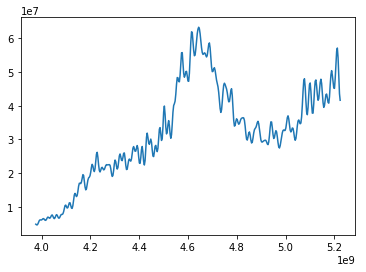

In [25]:
plot(x['freqs'][x['valid']], np.nanmean(x['xxoff'], 0)[x['valid']])

In [40]:
fnames[k].split('.fits')

['/data2/GBT/3C295/OnOff/scan40.raw.vegas/scan40.raw.vegas.A', '']

In [47]:
f = mpl.pyplot.figure()

In [48]:
savefig()

SyntaxError: invalid syntax (<ipython-input-48-4f0dd52d028c>, line 1)

In [ ]:
savefig()

In [5]:
plots = True

In [6]:
def mad(x, axis=None):
    return np.nanmedian(np.abs(x - np.nanmedian(x, axis)), axis)

In [7]:
def moving_median(x, N):
    idx = np.arange(N) + np.arange(len(x) - N + 1)[:, None]
    return np.nanmedian(x[idx], axis=1)

In [8]:
test1 = fits.open(fnames[k])
print fnames[k]
hdu = test1[1]
data = hdu.data['DATA']
result = {}
result['source'] = hdu.data['PROCSCAN'][0]

N = 2**14
df = hdu.data['CDELT1'][0]
center_freq = hdu.data['CRVAL1'][0]
centerbin = hdu.data['CRPIX1'][0]
index = np.arange(N)
if_freqs = freqstest = index * (-df) # in Hz
freqs = (center_freq + df * (index + 1 - centerbin))[::-1]
result['if_freqs'] = if_freqs
result['centerfreq'] = center_freq
result['freqs'] = freqs

result['xxoff'] = data[::8,::-1]
result['xxon'] = data[1::8,::-1]
result['yyoff'] = data[2::8,::-1]
result['yyon'] = data[3::8,::-1]
result['xyoff'] = data[4::8,::-1]
result['xyon'] = data[5::8,::-1]
result['yxoff'] = data[6::8,::-1]
result['yxon'] = data[7::8,::-1]

/data2/GBT/3C295/OnOff/scan40.raw.vegas/scan40.raw.vegas.A.fits


In [9]:
def getmask():
    noiser = result['xxon'] - result['xxoff']
    mask = np.ones(N, dtype=bool)
    mask[(index % 512) == 0] = False
    normed_data = (np.nanmedian(result['xxoff'], 0) / np.nanmedian(noiser, 0))
    normed_data[~mask] = np.nan
    mvmedspec = moving_median(normed_data, 5)
    flatdata = (normed_data[2:-2] - mvmedspec)
    mask[if_freqs < 150.e6] = False
    mask[if_freqs > 1400.e6] = False
    flatdata[~mask[2:-2]] = np.nan
    madspec = mad(flatdata)
    mask[2:-2][flatdata > (16 * madspec)] = False
    plot(flatdata, 'r')
    flatdata[~mask[2:-2]] = np.nan
    plot(flatdata)
    nstd = np.nanstd(flatdata)
    axhline(16 * madspec, color='g')
    ylim(-10*nstd, 10*nstd)
    return mask

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in greater


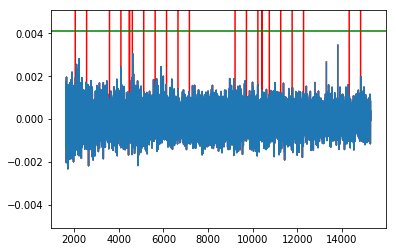

In [10]:
mask1 = getmask()

In [49]:
xd = result['xxoff']

In [50]:
xd.shape

(1431, 16384)

In [51]:
bigmask = np.broadcast_to(mask1, xd.shape)

In [52]:
xd[~bigmask] = np.nan

In [53]:
y = np.nanmean(xd.reshape(1431, 512, -1), 2)

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


In [54]:
y.shape

(1431, 512)

In [11]:
xd = np.nanmedian(result['xxoff'], 0)

In [13]:
xd[~mask1] = np.nan

In [14]:
y = xd.reshape(512, -1)
y = np.nanmean(y, 1)

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: Mean of empty slice
  from ipykernel import kernelapp as app


In [16]:
mask = mask1.reshape(512, -1).astype(int)

In [17]:
mask = np.sum(mask, 1)

In [18]:
mask512 = mask > 0 

In [19]:
nfreqs = freqs + 0.

In [20]:
nfreqs[~mask1] = np.nan

In [21]:
freqs512 = nfreqs.reshape(512, -1)
freqs512= np.nanmean(freqs512, 1)

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: Mean of empty slice
  from ipykernel import kernelapp as app
